In [1]:
!pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 10.2 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import GridSearchCV

In [3]:
FeaturesData = pd.read_csv('/content/removed_mislabelled_euclidean.csv', header=None)
# FeaturesData.drop(columns=[1, 2])

In [4]:
ZeroList = []
for i in range(FeaturesData.iloc[:, 0].shape[0]):
  if FeaturesData.iloc[i, 0] == 0:
    ZeroList.append(i)
NoZeroData = FeaturesData.drop(ZeroList)
# NoZeroData.to_csv('/content/NoZeroFeaturesMatrix.csv')
NoZero_X = NoZeroData.iloc[:, 3:]
NoZero_y = NoZeroData.iloc[:, 0]
NoZero_train_X, NoZero_test_X, NoZero_train_y, NoZero_test_y = train_test_split(NoZero_X, NoZero_y, test_size=0.33, random_state=1)


In [5]:
ZeroOneData = FeaturesData.copy()
for i in range(ZeroOneData.iloc[:, 0].shape[0]):
  if ZeroOneData.iloc[i, 0] != 0:
    ZeroOneData.iloc[i, 0] = 1
ZeroOneData.to_csv('/content/ZeroOneFeaturesMatrix.csv')
ZeroOne_X = ZeroOneData.iloc[:, 3:]
ZeroOne_y = ZeroOneData.iloc[:, 0]
ZeroOne_train_X, ZeroOne_test_X, ZeroOne_train_y, ZeroOne_test_y = train_test_split(ZeroOne_X, ZeroOne_y, test_size=0.33, random_state=1)


In [37]:
NegToPosData = FeaturesData.copy()
NegPosValList = []
# print(type(NegToPosData.iloc[i, 1]))
for i in range(NegToPosData.iloc[:, 1].shape[0]):
  if NegToPosData.iloc[i, 0] == 0:
    NegToPosData.drop([i])
  else:
    NegPosValList.append((NegToPosData.iloc[i, 1], NegToPosData.iloc[i, 2]))

print(NegToPosData.shape, len(NegPosValList))
NegToPosData.insert(3, '4', NegPosValList)                            
NegToPosData.drop(columns=[0, 1])

(3013, 18) 1522


ValueError: ignored

In [6]:
FeaturesData = pd.read_csv('/content/removed_mislabelled_euclidean.csv', header=None)
BestFeaturesData = pd.read_csv('/content/best_features_matrix.csv', header=None)
DirectionFeaturesData = pd.read_csv('/content/DiretionMatrix_Euclidean.csv', header=None)
BestDirectionFeaturesData = pd.read_csv('/content/BestDiretionMatrix.csv', header=None)
X = FeaturesData.iloc[:, 1:]
y = FeaturesData.iloc[:, 0]
best_X = BestFeaturesData.iloc[:, 1:]
best_y = BestFeaturesData.iloc[:, 0]
D_X = DirectionFeaturesData.iloc[:, 1:]
D_y = DirectionFeaturesData.iloc[:, 0]
bestD_X = BestDirectionFeaturesData.iloc[:, 1:]
bestD_y = BestDirectionFeaturesData.iloc[:, 0]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=1)
best_train_X, best_test_X, best_train_y, best_test_y = train_test_split(best_X, best_y, test_size=0.33, random_state=1)
d_train_X, d_test_X, d_train_y, d_test_y = train_test_split(D_X, D_y, test_size=0.33, random_state=1)
best_d_train_X, best_d_test_X, best_d_train_y, best_d_test_y = train_test_split(bestD_X, bestD_y, test_size=0.33, random_state=1)

In [9]:
def RanForest(Data):
    clf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=0, min_samples_leaf=3, 
                                 criterion='gini')
    clf.fit(Data[0], Data[2])
    # clf.fit(Data[0], Data[2])
    Predictions = clf.predict(Data[0])
    train_acc_perceptron = accuracy_score(Data[2], Predictions)
    print('The accuracy of the Random Forest classifier on the training set is %s' % train_acc_perceptron)
    Score = clf.score(Data[1], Data[3])
    print('Score from Random Forest Classifier: %s' % Score)


RanForest([train_X, test_X, train_y, test_y])
RanForest([NoZero_train_X, NoZero_test_X, NoZero_train_y, NoZero_test_y])
RanForest([ZeroOne_train_X, ZeroOne_test_X, ZeroOne_train_y, ZeroOne_test_y])
RanForest([best_train_X, best_test_X, best_train_y, best_test_y])
RanForest([d_train_X, d_test_X, d_train_y, d_test_y])
RanForest([best_d_train_X, best_d_test_X, best_d_train_y, best_d_test_y])

The accuracy of the Random Forest classifier on the training set is 0.9345887016848364
Score from Random Forest Classifier: 0.9195979899497487
The accuracy of the Random Forest classifier on the training set is 0.8792934249263984
Score from Random Forest Classifier: 0.7833001988071571
The accuracy of the Random Forest classifier on the training set is 0.9598612487611496
Score from Random Forest Classifier: 0.9226130653266331
The accuracy of the Random Forest classifier on the training set is 0.8397683397683398
Score from Random Forest Classifier: 0.7945205479452054
The accuracy of the Random Forest classifier on the training set is 0.9037433155080213
Score from Random Forest Classifier: 0.7371273712737128
The accuracy of the Random Forest classifier on the training set is 0.7871485943775101
Score from Random Forest Classifier: 0.5013550135501355


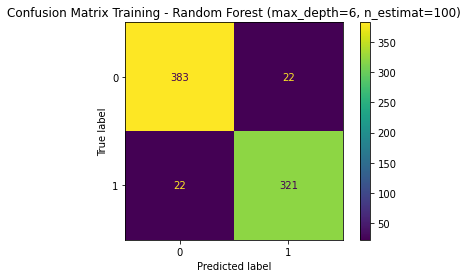

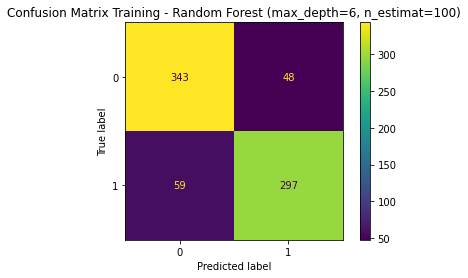

In [15]:
def PlotConfus(X, y):
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=1)
  clf = RandomForestClassifier(n_estimators=500, max_depth=7, random_state=0, min_samples_leaf=1, 
                                  criterion='gini')
  clf.fit(train_X, train_y)
  Predictions = clf.predict(train_X)
  CM = confusion_matrix(train_y, Predictions, labels=clf.classes_)
  ConfusionMatrixDisplay.from_predictions(train_y, Predictions, display_labels=clf.classes_)
  # ConfusionMatrixDisplay.from_estimator(clf, test_X, test_y)

  plt.title('Confusion Matrix Training - Random Forest (max_depth=6, n_estimat=100)')
  # plt.savefig('/content/ConfusionMatrix_RandomForest_Training.png')
  plt.show

PlotConfus(D_X, D_y)
PlotConfus(bestD_X, bestD_y)

In [8]:
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
estimator = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, min_samples_leaf=1, 
                                 criterion='gini', n_jobs=-1)
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator, bestD_X, bestD_y, train_sizes=np.linspace(0.1, 1.0, 5), 
                                                                      return_times=True, cv=cv)

In [9]:
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

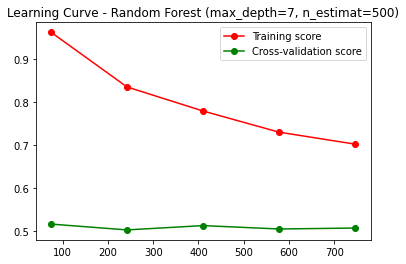

In [10]:
_, axes = plt.subplots()
axes.set_title('Learning Curve - Random Forest (max_depth=7, n_estimat=500)')
axes.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
axes.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
axes.legend(loc='best')
plt.savefig('/content/LearningCurve_RandomForest_4.png')
plt.show()


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0, min_samples_leaf=1, 
                                 criterion='gini')
def Bias_Var(model, Data):
  mse, bias, var = bias_variance_decomp(model, np.array(Data[0]), np.array(Data[2]), 
                                        np.array(Data[1]), np.array(Data[3]), loss='mse', num_rounds=200, random_seed=1)
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)

Bias_Var(model, [train_X, test_X, train_y, test_y])
Bias_Var(model, [NoZero_train_X, NoZero_test_X, NoZero_train_y, NoZero_test_y])
Bias_Var(model, [ZeroOne_train_X, ZeroOne_test_X, ZeroOne_train_y, ZeroOne_test_y])
Bias_Var(model, [best_train_X, best_test_X, best_train_y, best_test_y])
Bias_Var(model, [d_train_X, d_test_X, d_train_y, d_test_y])
Bias_Var(model, [best_d_train_X, best_d_test_X, best_d_train_y, best_d_test_y])

In [13]:
parameters = {'n_estimators':[10, 50, 100, 200, 300, 400, 500], 'max_depth':[3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split':[1, 2, 3, 4, 5]}
              # 'min_samples_leaf':[1, 2, 3, 4, 5], 'max_leaf_nodes':[None, 1, 2, 3, 4, 5]}
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
RF = RandomForestClassifier(n_jobs=-1)
clf = GridSearchCV(RF, parameters, return_train_score=True, n_jobs=-1)
clf.fit(ZeroOne_train_X, ZeroOne_train_y)
clf.best_estimator_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 1400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1056, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 935

RandomForestClassifier(max_depth=5, min_samples_split=4, n_estimators=50,
                       n_jobs=-1)